In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Problem Statement:

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

This problem statement contains two datasets- Zomato.csv and country_code.csv.

Country_code.csv contains two variables:

1. Country code

2. Country name

In [2]:
#importing or loading the dataset
df1 = pd.read_excel('C:/Users/Shashanka S/Desktop/evaluation projects/Country-Code.xlsx')
df2 = pd.read_csv('zomato2.csv')

The collected data has been stored in the Comma Separated Value file Zomato.csv. 

Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant&#39;s location

• Latitude: Latitude coordinate of the restaurant&#39;s location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies 

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things:

1) Average Cost for two

2) Price range

In [3]:
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [4]:
df2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
#Dataset to be analysed
df = df2

In [6]:
#Checking of column names
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
#Checking for data shape
df.shape

(9551, 21)

In [8]:
#Checking data types
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [9]:
#Checking any null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
#Checking any blank or white spaces
np.where(df.applymap(lambda x: x == ' '))

(array([], dtype=int64), array([], dtype=int64))

In [11]:
#Checking if all entries of a column is unique or not
for i in df.columns:
    print('For column of {} :'.format(i),(len(df[i].unique())==len(df[i])))

For column of Restaurant ID : True
For column of Restaurant Name : False
For column of Country Code : False
For column of City : False
For column of Address : False
For column of Locality : False
For column of Locality Verbose : False
For column of Longitude : False
For column of Latitude : False
For column of Cuisines : False
For column of Average Cost for two : False
For column of Currency : False
For column of Has Table booking : False
For column of Has Online delivery : False
For column of Is delivering now : False
For column of Switch to order menu : False
For column of Price range : False
For column of Aggregate rating : False
For column of Rating color : False
For column of Rating text : False
For column of Votes : False


Restaurant ID is having all unique entries and act just like indexing column

Lets us drop this column

In [12]:
#Dropping that column
df = df.drop(['Restaurant ID'], axis=1)

In [13]:
#Removing duplicate rows if any
print('Size before: ',df.shape)
df.drop_duplicates()
print('Size after: ',df.shape)

Size before:  (9551, 20)
Size after:  (9551, 20)


In [14]:
#General information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [15]:
#Seperating categorical and numerical data data columns
categorical = ['Restaurant Name','City', 'Address','Locality', 'Locality Verbose','Cuisines',
              'Currency', 'Has Table booking','Has Online delivery', 
              'Is delivering now', 'Switch to order menu','Rating color', 
              'Rating text']
numerical = ['Country Code',  'Longitude', 'Latitude', 'Average Cost for two', 
             'Price range', 'Aggregate rating','Votes']

In [16]:
#NaN handling Imputing mode/most frequent values
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])
df.isnull().sum().sum()

0

In [17]:
#Checking of value counts in each columns categorical data
for i in categorical:
    print(df[i].value_counts(),'\n')

Cafe Coffee Day            83
Domino's Pizza             79
Subway                     63
Green Chick Chop           51
McDonald's                 48
                           ..
Chakna                      1
Villa Shanti                1
De Royale Food's            1
Old Delhi Food Factory      1
Taoji Ke Amratsari Naan     1
Name: Restaurant Name, Length: 7446, dtype: int64 

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
             ... 
Princeton       1
Cochrane        1
Monroe          1
Balingup        1
Lorn            1
Name: City, Length: 141, dtype: int64 

Sector 41, Noida                                                              11
Dilli Haat, INA, New Delhi                                                    11
Greater Kailash (GK) 1, New Delhi                                             10
The Imperial, Janpath, New Delhi                                               9
Food Court, 3rd Floor, Logix City Centre, Sector 32, Nea

In [18]:
#Checking of value counts in each columns numerical data
for i in numerical:
    print(df[i].value_counts(),'\n')

1      8652
216     434
215      80
189      60
30       60
214      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64 

0.000000     498
77.353663     19
77.230412     12
77.088688     10
77.353574      9
            ... 
77.280266      1
74.874619      1
72.772629      1
77.315309      1
77.177358      1
Name: Longitude, Length: 8120, dtype: int64 

0.000000     498
28.574309     16
28.574300      9
28.551456      9
28.597103      8
            ... 
28.700426      1
28.627976      1
28.600257      1
28.533091      1
28.592512      1
Name: Latitude, Length: 8677, dtype: int64 

500       900
300       897
400       857
200       687
600       652
         ... 
500000      1
1540        1
125         1
445         1
535         1
Name: Average Cost for two, Length: 140, dtype: int64 

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64 

0.0    2148
3.2     522
3.1     519


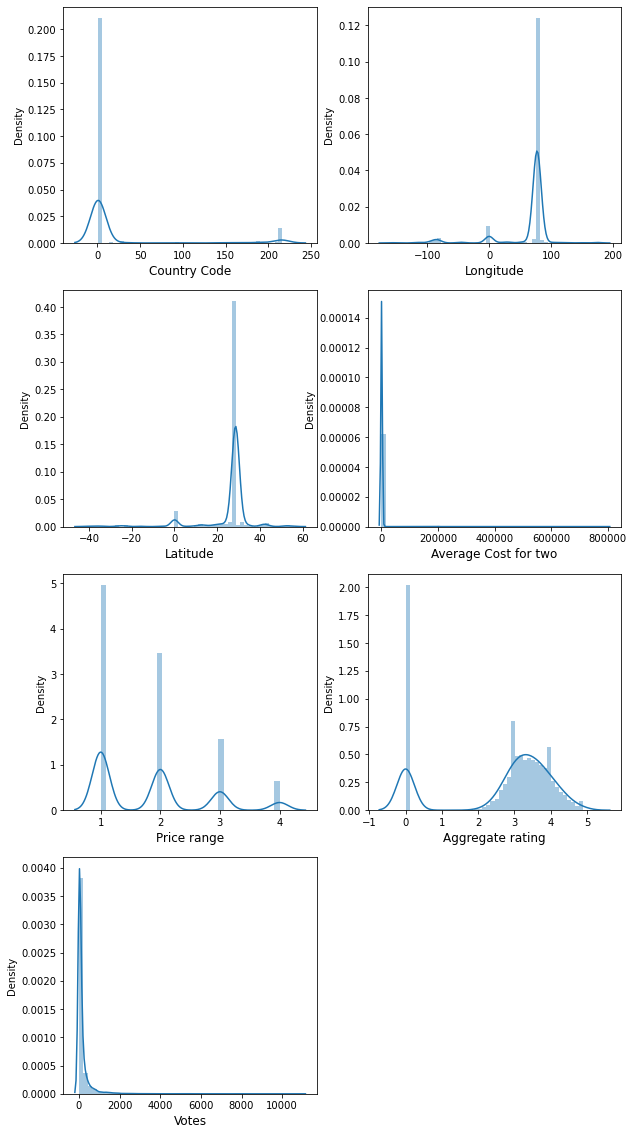

In [20]:
#Checking of distribution plot of each columns having numerical data
plt.figure(figsize=(10,20))
pltno = 1
for columns in numerical:
    if pltno <=7:
        ax = plt.subplot(4,2,pltno)
        sns.distplot(df[columns])
        plt.xlabel(columns, fontsize=12)       
    pltno += 1
plt.show()

We can observe most of the country code is 1, which is India

Correspondingly Latitude and longitude locations points out Indian restuarants co-ordinates

Majorly average cost for 2 lies within range of 1500 INR correspondingly withing price range of 1 & 2 most of restuarants are there

The data are highly skewed, needs outliers handling and proper transformation before training the model

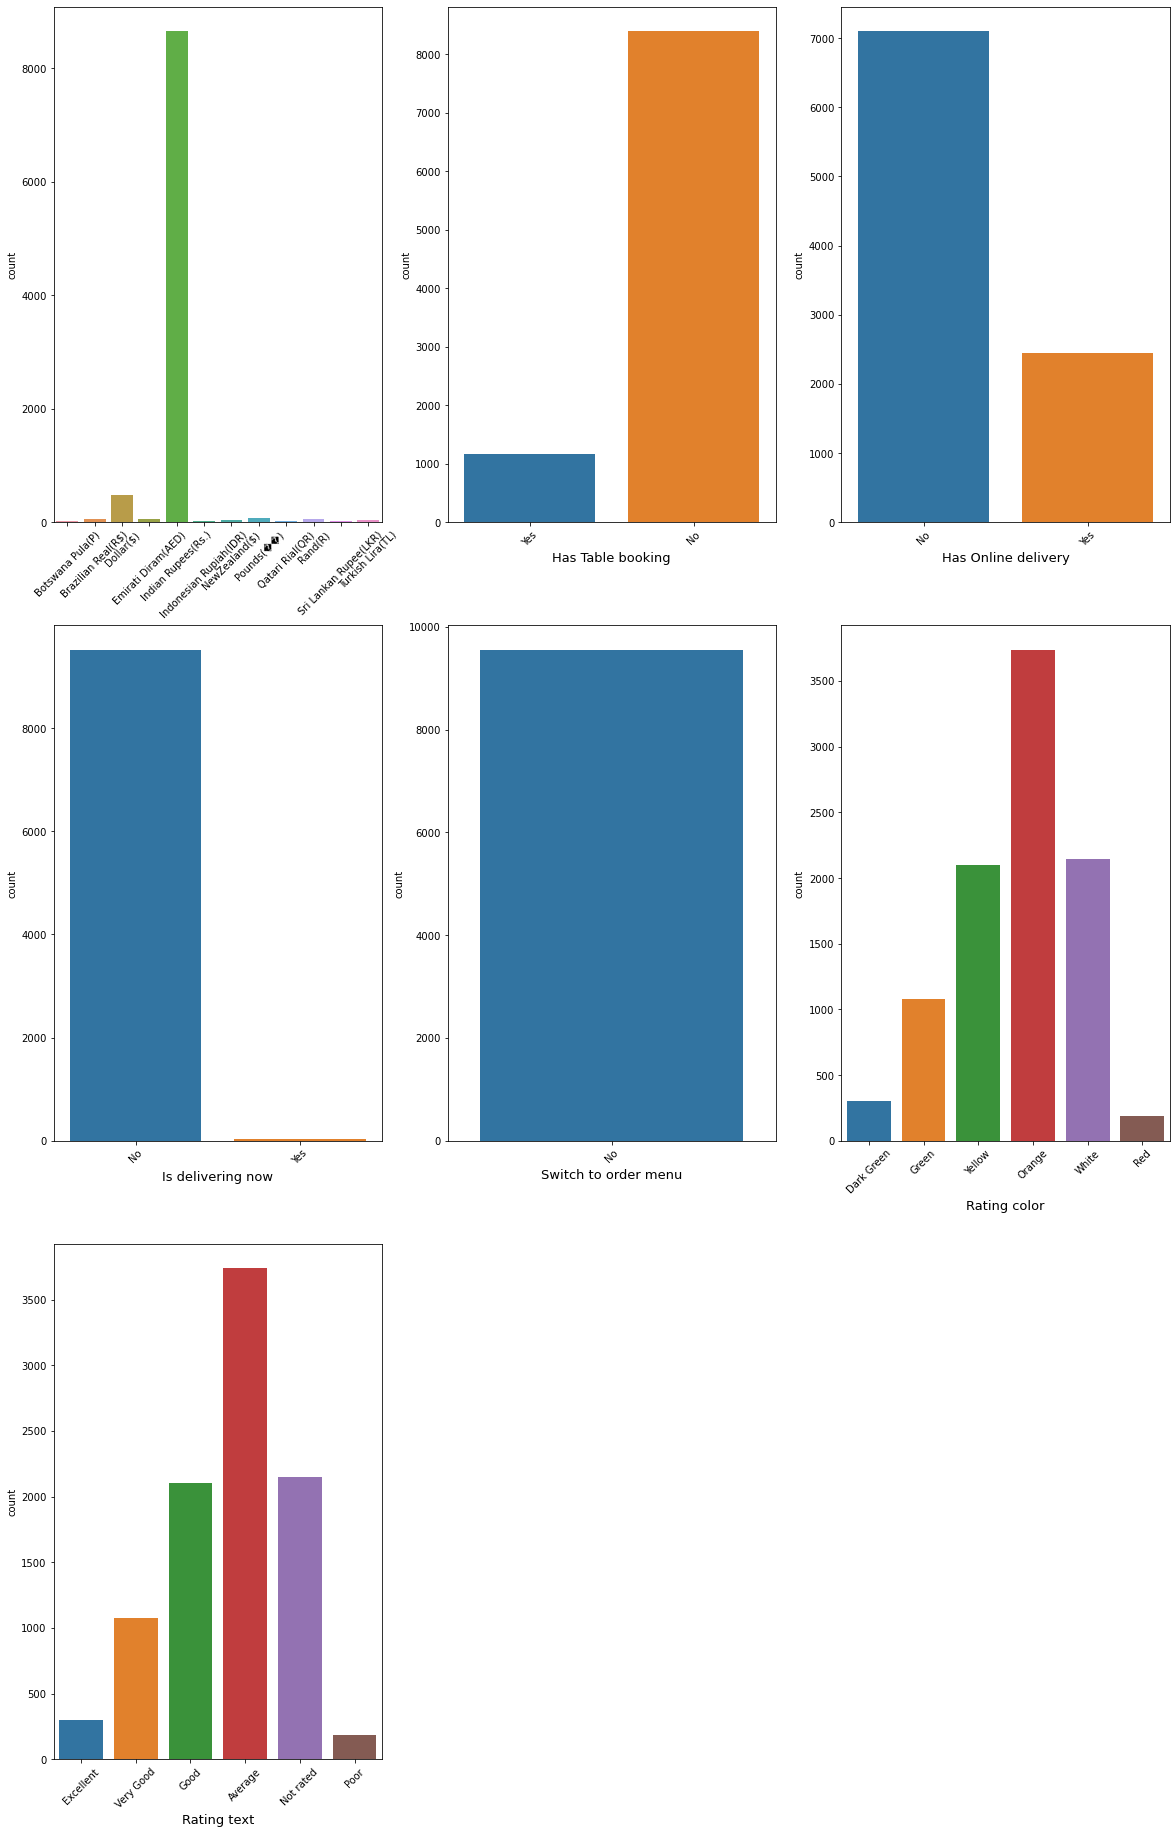

In [28]:
#Categorical
#Checking of value counts in each columns having categorical data
plt.figure(figsize=(20,55))
pltno = 1
for columns in categorical[6:]:
    if pltno <=13:
        ax = plt.subplot(5,3,pltno)
        sns.countplot(df[columns])
        plt.xlabel(columns, fontsize=13) 
        plt.xticks(rotation = 45)
    pltno += 1
plt.show()

We can observe that majority of currency is INR

Majority of restuarants has no table booking and has online delivery

'Switch to order menu' is having all single entries as 'No', this wonts help in predictions

'Is delivering now' is having highly imbalanced class having very less proportion of 'Yes' 

So let us drop these columns

'Address' can be dropped as this carry almost all unique entries and location information can be obtained by co-ordinates also

'Locality Verbose' convey almost similar information as that of 'Locality'

So let us drop these 2 columns

Rating color and text conveying same information, let us drop the first column

In [41]:
df = df.drop(['Is delivering now','Switch to order menu','Locality Verbose','Address', 'Rating color'], axis=1)

categorical = ['Restaurant Name','City', 'Locality', 'Cuisines','Currency', 
               'Has Table booking','Has Online delivery', 'Rating text']

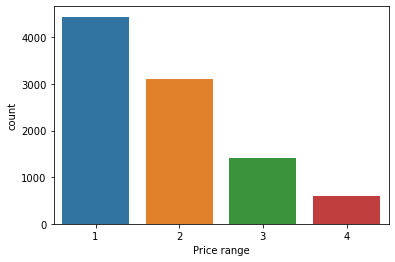

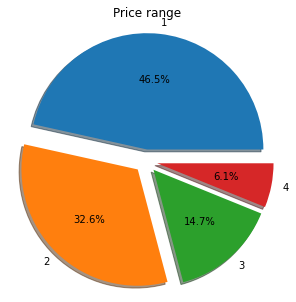

In [42]:
#Checking of value counts in target variable
sns.countplot(df['Price range'])
plt.show()

var = 'Price range'
plt.figure(figsize=(5,5))
data = list(df[var].value_counts())
plt.pie(data, labels= [1,2,3,4], autopct='%1.1f%%', explode=[0.1,0.1,0.1,0.1], shadow=True)
plt.axis('equal')
plt.title(var)
plt.show()

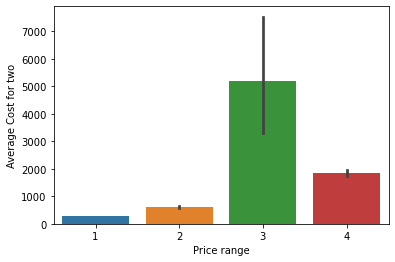

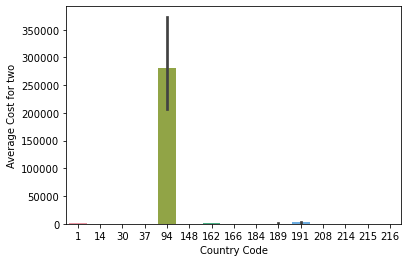

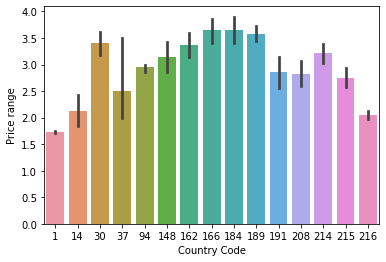

In [47]:
#Average cost based on different price range
sns.barplot(y = df['Average Cost for two'] , x = df['Price range'])
plt.show()

#Average cost based on country code
sns.barplot(y = df['Average Cost for two'] , x = df['Country Code'])
plt.show()

#price range based on country code
sns.barplot(y = df['Price range'] , x = df['Country Code'])
plt.show()

We can observe that average cost is more in Price range 3 restuarants

We can observe that average cost is more in country code 94 - Indonesia

From garph 3 we can observe that Indonesia falls under price range 3

Least price range near 1.8 for 1 - India

Highest price range of 3.6 for 166 - Qatar and 184 - Singapore

In [46]:
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


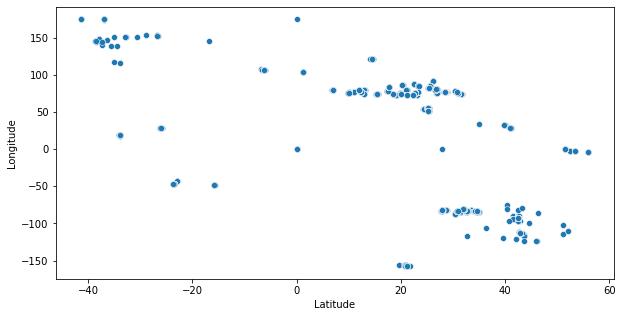

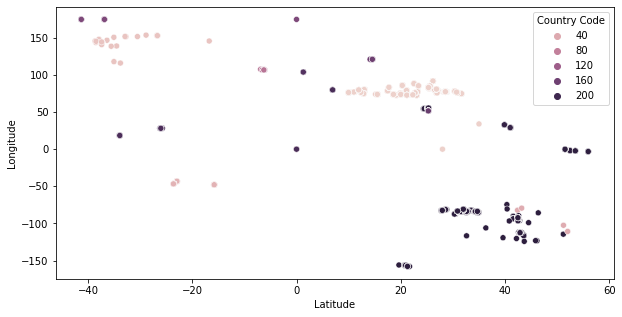

In [61]:
#Latitude vs Longitude for getting co-ordinates
plt.figure(figsize=(10,5))
sns.scatterplot(y = df['Longitude'] , x = df['Latitude'])
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(y = df['Longitude'] , x = df['Latitude'], hue = df['Country Code'])
plt.show()

The above points shows geo co-ordinates of restuarants present around the world

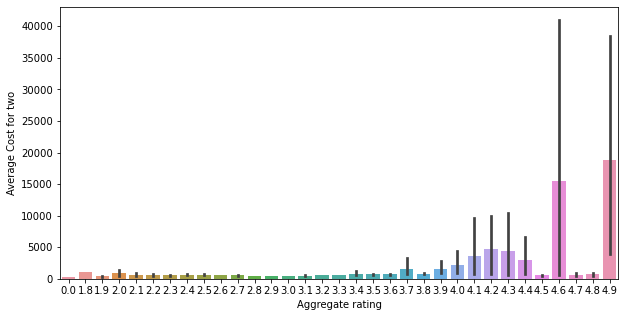

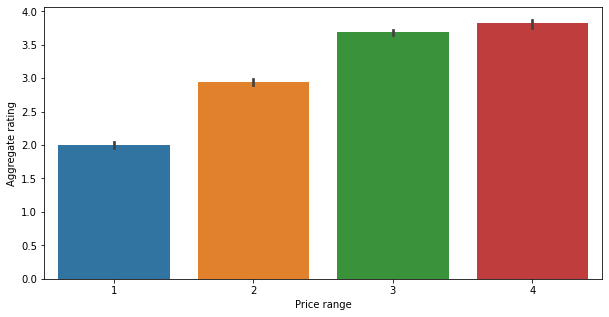

In [68]:
#Average Cost for two cost based on different rating
plt.figure(figsize=(10,5))
sns.barplot(x = df['Aggregate rating'] , y = df['Average Cost for two'])
plt.show()

#Rating based on different price range
plt.figure(figsize=(10,5))
sns.barplot(x = df['Price range'] , y = df['Aggregate rating'])
plt.show()

We can observe that as price range increases average rating increases and correspondingly there is more Average cost for 2

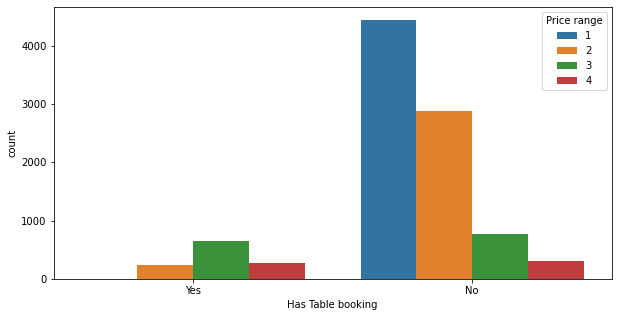

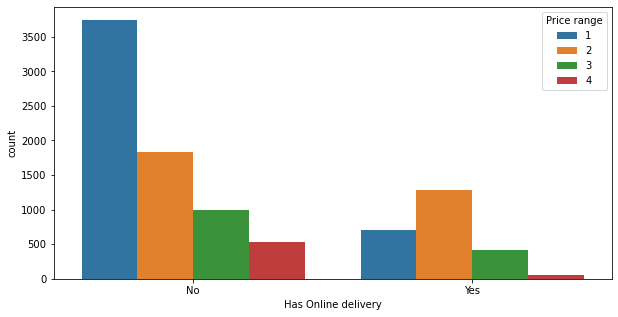

In [71]:
#Mode of eating (delivery/dine in) on different price range
plt.figure(figsize=(10,5))
sns.countplot(df['Has Table booking'], hue = df['Price range'])
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(df['Has Online delivery'], hue = df['Price range'])
plt.show()

Among the resuarants having no table booking: Price range 1 hotels are most common
    
Among the resuarants having table booking: Price range 3 hotels are most common
    
Among the resuarants having no online delivery: Price range 1 hotels are most common
    
Among the resuarants having online delivery: Price range 2 hotels are most common

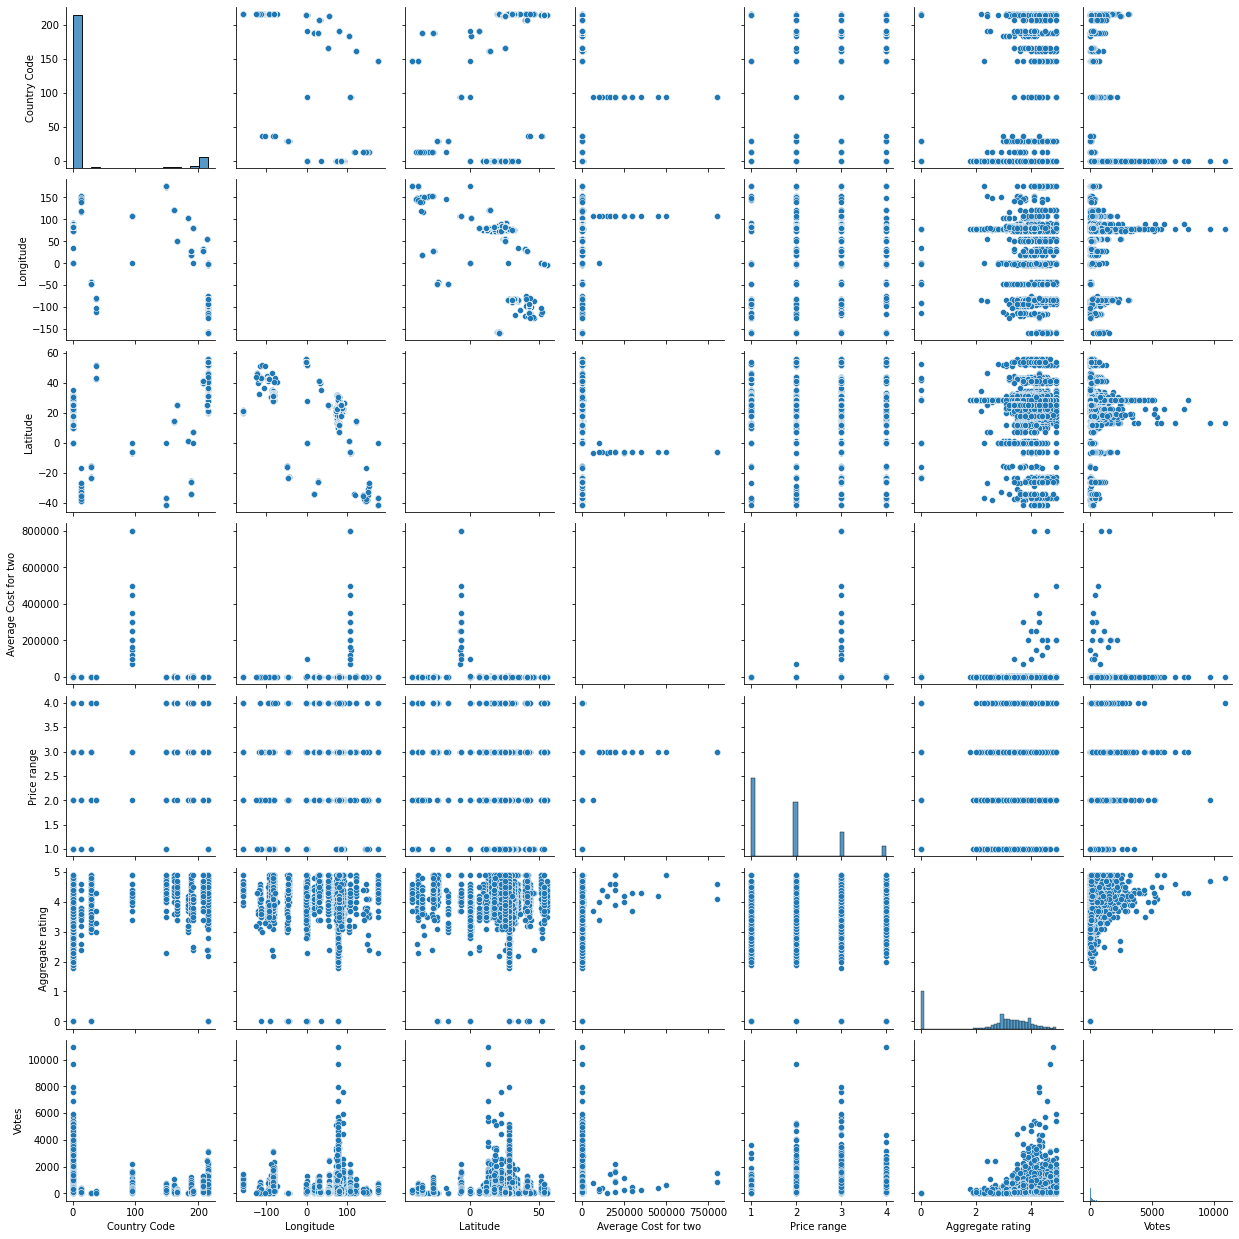

In [73]:
#Plotting all possible bivariate plots together
sns.pairplot(df)
plt.show()

In [74]:
categorical

['Restaurant Name',
 'City',
 'Locality',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Rating text']

In [75]:
#Let us include price range in categorical data, since it is of ordinal in nature
#Alsocountry code is of nominaltype
categorical = ['Restaurant Name','City','Locality', 'Cuisines',
              'Currency', 'Has Table booking','Has Online delivery', 
              'Rating text','Price range','Country Code']
numerical = [ 'Longitude', 'Latitude', 'Average Cost for two', 
              'Aggregate rating','Votes']

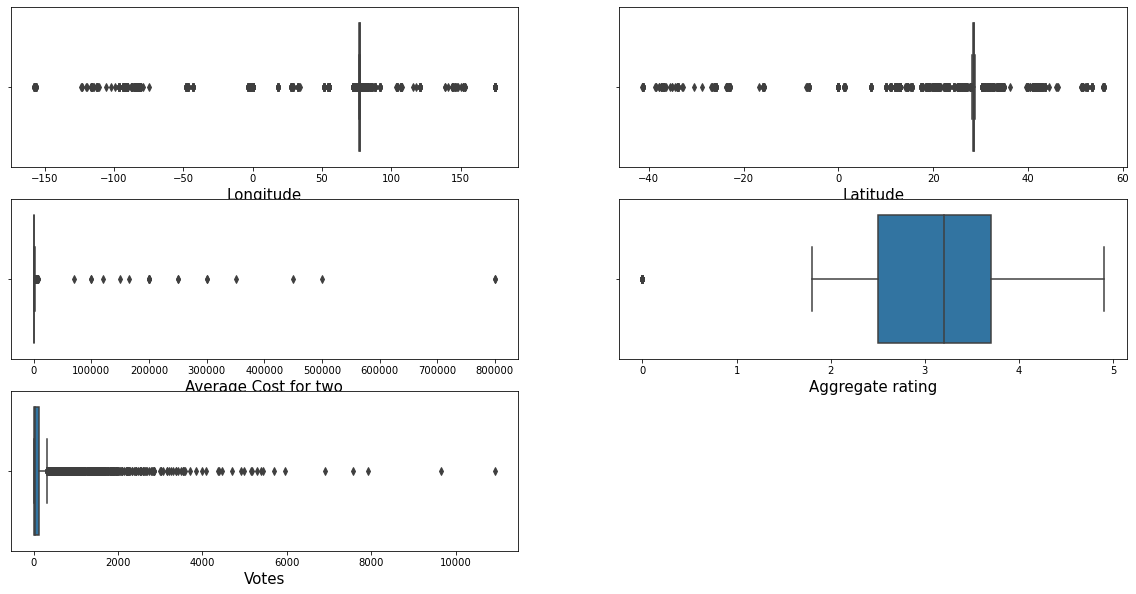

In [77]:
#Outliers/noise checking for input numerical feature columns
plt.figure(figsize=(20,10))
pltno = 1
for columns in numerical:
    if pltno <=5:
        ax = plt.subplot(3,2,pltno)
        sns.boxplot(x = df[columns])
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

All data has outliers, need to be properly handled

In [78]:
#Statistical summary of the data
df.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [79]:
#Coefficient of correlation matrix
df.corr()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Country Code,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


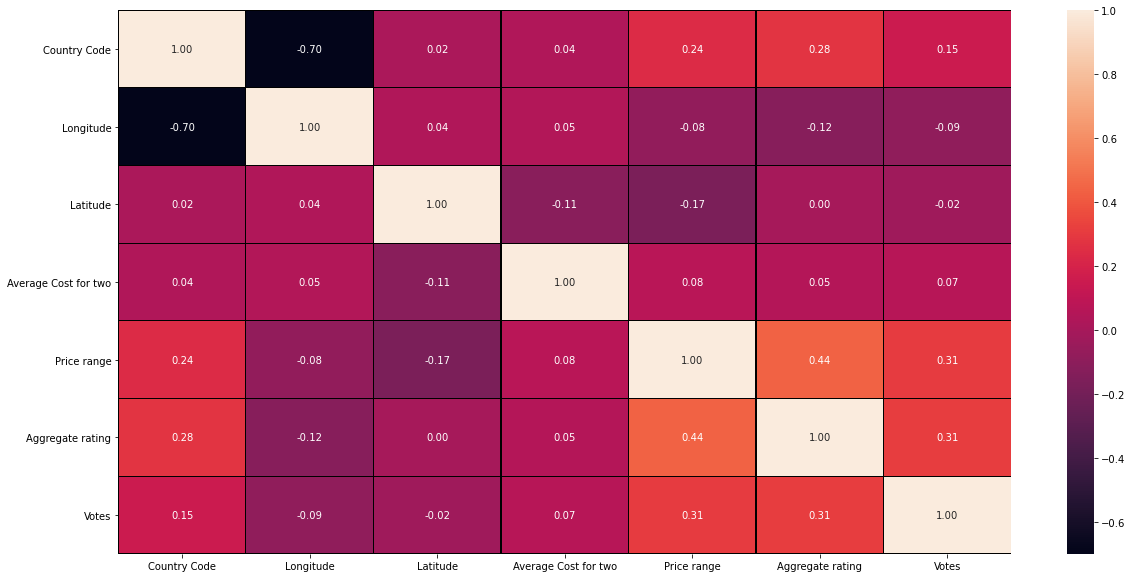

In [80]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

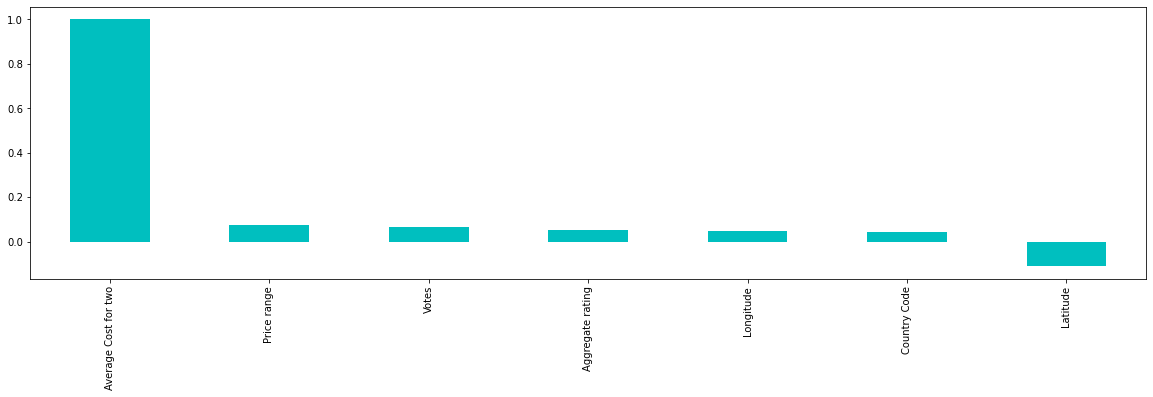

Average Cost for two    1.000000
Price range             0.075083
Votes                   0.067783
Aggregate rating        0.051792
Longitude               0.045891
Country Code            0.043225
Latitude               -0.111088
Name: Average Cost for two, dtype: float64

In [82]:
#Sorting descending values of correlation data of target variable
#Plotting the same for vizualization
plt.figure(figsize=(20,5))
df.corr()['Average Cost for two'].sort_values(ascending=False).plot(kind='bar', color='c')
plt.show()
df.corr()['Average Cost for two'].sort_values(ascending=False)

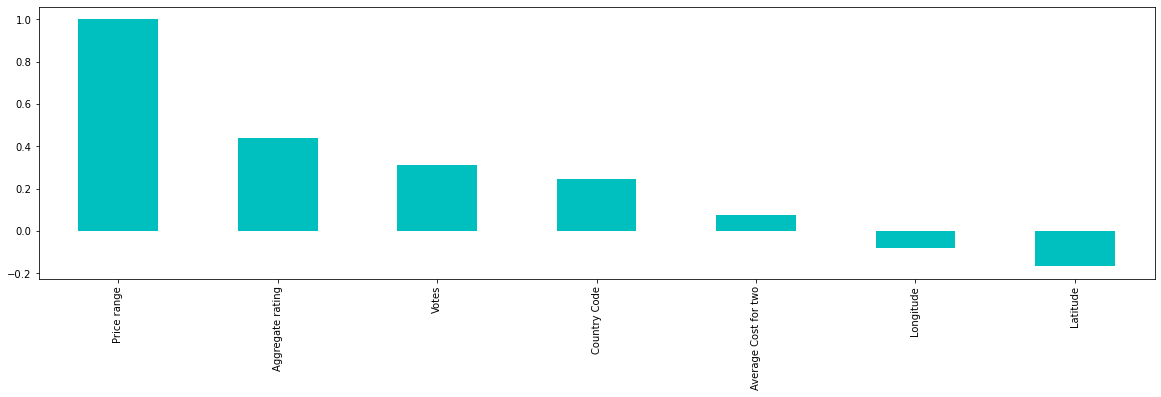

Price range             1.000000
Aggregate rating        0.437944
Votes                   0.309444
Country Code            0.243327
Average Cost for two    0.075083
Longitude              -0.078939
Latitude               -0.166688
Name: Price range, dtype: float64

In [84]:
#Sorting descending values of correlation data of target variable
#Plotting the same for vizualization
plt.figure(figsize=(20,5))
df.corr()['Price range'].sort_values(ascending=False).plot(kind='bar', color='c')
plt.show()
df.corr()['Price range'].sort_values(ascending=False)

In [85]:
#Encoding the categorical/text type data into numerical form
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for i in categorical:
    df[i] = enc.fit_transform(df[i].values.reshape(-1,1))
    
df.head()

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes
0,3749,6,73,171,121.027535,14.565443,920,1100,0,1,0,2,4.8,1,314
1,3173,6,73,593,121.014101,14.553708,1111,1200,0,1,0,2,4.5,1,591
2,2897,6,75,308,121.056831,14.581404,1671,4000,0,1,0,3,4.4,5,270
3,4707,6,75,862,121.056475,14.585318,1126,1500,0,0,0,3,4.9,1,365
4,5523,6,75,862,121.057508,14.584450,1122,1500,0,1,0,3,4.8,1,229


In [86]:
#Removing of outliers by zscore method
print('Shape before',df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df[numerical]))
df_new = df[(z<3).all(axis=1)]
print('Shape after',df_new.shape)

#Percentage loss of data
loss = (df.shape[0]-df_new.shape[0])*100/(df.shape[0])
print(loss,'% loss of data')

Shape before (9551, 15)
Shape after (8756, 15)
8.323735734478065 % loss of data


## Average cost for two prediction (Regression approach)

In [90]:
#Seperate feature and target columns
x = df_new.drop('Average Cost for two', axis=1)
y = df_new['Average Cost for two']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (8756, 14)
y shape (8756,)


In [91]:
#We need to scale the data check VIF to handle multicollinearity
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_new = sc.fit_transform(x)
x_new = pd.DataFrame(x_new, columns = x.columns)

# Feature selection

In [93]:
numerical = [ 'Longitude', 'Latitude', 'Aggregate rating','Votes']

In [94]:
#VIF method to check multicollinearity 
#Checing for continuous input feature columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif = [variance_inflation_factor(x_new[numerical].values,i) for i in range(x_new[numerical].shape[1])]
vif

[1.595864174084487, 1.5973520619519204, 1.2326389328430547, 1.2181227884652222]

No issue of multicollinearity as the VIF value of columns having continuous data are within the limit of 5

In [95]:
x[numerical].skew()

Longitude          -3.179687
Latitude           -2.246169
Aggregate rating   -0.887535
Votes               3.555810
dtype: float64

In [96]:
#Apply power transform to reduce skewness
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer()
for col in numerical:
    if x.skew().loc[col]>0.55:
        x[col] = po.fit_transform(x[col].values.reshape(-1,1))

In [98]:
#Feature selection
from sklearn.ensemble import ExtraTreesClassifier
fs = ExtraTreesClassifier()
fs.fit(x, y)

ExtraTreesClassifier()

In [99]:
imp = fs.feature_importances_
for index, val in enumerate(imp):
    print(index, round((val * 100), 2))

0 14.22
1 0.37
2 4.11
3 11.1
4 11.74
5 12.01
6 14.05
7 0.26
8 1.43
9 1.06
10 9.93
11 7.36
12 2.02
13 10.35


In [100]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8756 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant Name      8756 non-null   int32  
 1   Country Code         8756 non-null   int64  
 2   City                 8756 non-null   int32  
 3   Locality             8756 non-null   int32  
 4   Longitude            8756 non-null   float64
 5   Latitude             8756 non-null   float64
 6   Cuisines             8756 non-null   int32  
 7   Currency             8756 non-null   int32  
 8   Has Table booking    8756 non-null   int32  
 9   Has Online delivery  8756 non-null   int32  
 10  Price range          8756 non-null   int64  
 11  Aggregate rating     8756 non-null   float64
 12  Rating text          8756 non-null   int32  
 13  Votes                8756 non-null   float64
dtypes: float64(4), int32(8), int64(2)
memory usage: 752.5 KB


In [101]:
#Let us select important features and drop rest columns. By considering top 70% are important
#Dropping off less important columns
x =  x.drop(['Country Code','Currency','Has Table booking','Has Online delivery'], axis=1)

In [106]:
# Linear regression model
# Selection of best random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
model = LinearRegression()
max_r2 = 0
for i in range(0,500):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.20)
    model.fit(xtr,ytr)
    predyt = model.predict(xt)
    r2 = r2_score(yt,predyt)
    
    if r2 > max_r2:
        max_r2 = r2
        print("Max r2 score =",max_r2)
        print("At RS =",i)

Max r2 score = 0.5862847449851716
At RS = 0
Max r2 score = 0.6294925604199577
At RS = 1
Max r2 score = 0.6307907498086018
At RS = 2
Max r2 score = 0.6430406552151832
At RS = 5
Max r2 score = 0.6508035775098567
At RS = 8
Max r2 score = 0.6513903270618215
At RS = 21
Max r2 score = 0.6733232464995682
At RS = 38
Max r2 score = 0.6770511161560526
At RS = 203


In [107]:
#Splitting at best random state
xtr, xt, ytr, yt = train_test_split(x,y, random_state=203,test_size=0.2)

#Training the model 
model = LinearRegression()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.6770511161560526 

Mean absolute error = 196.46627977243097 

Root mean squared error = 328.99432031761626 



In [108]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,10):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 2 = 0.4640123174489224
CV score at 3 = 0.47446846662106185
CV score at 4 = 0.49644319134064846
CV score at 5 = 0.3340256726600865
CV score at 6 = 0.3710887016756321
CV score at 7 = 0.36960779401766125
CV score at 8 = 0.3802851449305581
CV score at 9 = 0.3924180364826293

Least difference of CV score and r2 score of testing is : 0.18060792481540416


In [109]:
#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Test r2 score', 'Mean abs error', 'Root mean squared error', 'CV score', 'r2-cv diff'])
model_result.loc[len(model_result.index)] = ['Linear regression', r2_test, mae, rme, cvs, least_diff] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score,r2-cv diff
0,Linear regression,0.677051,196.46628,328.99432,0.496443,0.180608


In [110]:
# Lasso regression
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.6770547901883539 

Mean absolute error = 196.20271544081905 

Root mean squared error = 328.99244890814856 



In [111]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.4981853534939188
CV score at 5 = 0.33786965998071283
CV score at 6 = 0.3750437424342616
CV score at 7 = 0.37358451686083866
CV score at 8 = 0.38425750366350153
CV score at 9 = 0.39631241764877806
CV score at 10 = 0.3914842719670514
CV score at 11 = 0.42234666980019886

Least difference of CV score and r2 score of testing is : 0.1788694366944351


In [113]:
#Hyperparameter tuning of Lasso model
from sklearn.model_selection import GridSearchCV
model = Lasso()
parameters = {'alpha':[0.0001,0.001, 0.01,0.1, 1, 10], 
              'random_state':list(range(10,200,10)), 
              'selection':['cyclic', 'random'],
              'tol':[0.0001,0.001,1,10]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

Lasso(alpha=1, random_state=10, tol=1)


In [126]:
#Trainig model as per best parameters
model = Lasso(alpha=1, random_state=10, tol=1)
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.6770547816934049 

Mean absolute error = 196.2028243514043 

Root mean squared error = 328.9924532351582 



In [130]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,10):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Lasso regression', r2_test, mae, rme, cvs, least_diff] 
model_result

CV score at 2 = 0.4653310792614644
CV score at 3 = 0.476168984098923
CV score at 4 = 0.49822765937611085
CV score at 5 = 0.3379803474556222
CV score at 6 = 0.37513354534493176
CV score at 7 = 0.37368271327079083
CV score at 8 = 0.38435391164761606
CV score at 9 = 0.39642441480621027

Least difference of CV score and r2 score of testing is : 0.17882712231729408


,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score,r2-cv diff
0,Linear regression,0.677051,196.466280,328.994320,0.496443,0.180608
1,Lasso regression,0.677055,196.202824,328.992453,0.498228,0.178827


In [135]:
# Ridge regression
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.6770481578843828 

Mean absolute error = 196.44505408031256 

Root mean squared error = 328.9958271386602 



In [136]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,10):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 2 = 0.46407342523763323
CV score at 3 = 0.4745151046984264
CV score at 4 = 0.4964880606214118
CV score at 5 = 0.33411943910635766
CV score at 6 = 0.37118106070061346
CV score at 7 = 0.36969523016733674
CV score at 8 = 0.3803714734970122
CV score at 9 = 0.39249696841641907

Least difference of CV score and r2 score of testing is : 0.18056009726297095


In [137]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Ridge regression', r2_test, mae, rme, cvs, least_diff] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score,r2-cv diff
0,Linear regression,0.677051,196.466280,328.994320,0.496443,0.180608
1,Lasso regression,0.677055,196.202824,328.992453,0.498228,0.178827
2,Ridge regression,0.677048,196.445054,328.995827,0.496488,0.180560


In [138]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.8739643194554221 

Mean absolute error = 125.66391775527852 

Root mean squared error = 205.52670603463636 



In [139]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,10):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 2 = 0.6966077261608526
CV score at 3 = 0.7164145489383523
CV score at 4 = 0.7064476440369092
CV score at 5 = 0.6596694992035018
CV score at 6 = 0.6495556287850817
CV score at 7 = 0.6558179202323797
CV score at 8 = 0.6770136703135224
CV score at 9 = 0.68117346921722

Least difference of CV score and r2 score of testing is : 0.15754977051706975


In [144]:
# Hyper parameter tuning of Gradient boosting regressor
parameters = {'criterion':['friedman_mse', 'squared_error', 'mae','mse'],
              'n_estimators':[100,150,200,300], 
              'max_depth' : [4,6,8,10,12],
              'learning_rate' : [0.01,0.1,1],
              'tol' : [0.0001,0.01,1,10]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingRegressor(criterion='mse', max_depth=10)


In [145]:
# Training for best parameter
model = GradientBoostingRegressor(criterion='mse', max_depth=10, n_estimators=100)
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.8602113901729066 

Mean absolute error = 116.19022599183614 

Root mean squared error = 216.44990496506912 



In [146]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,10):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 2 = 0.5366006588328083
CV score at 3 = 0.5605241252692107
CV score at 4 = 0.5988680083556426
CV score at 5 = 0.5308944741486034
CV score at 6 = 0.563385791686024
CV score at 7 = 0.5590099227141094
CV score at 8 = 0.5603388118696333
CV score at 9 = 0.5678765271797556

Least difference of CV score and r2 score of testing is : 0.261343381817264


In [147]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Gradient boosting regressor', r2_test, mae, rme, cvs, least_diff] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score,r2-cv diff
0,Linear regression,0.677051,196.466280,328.994320,0.496443,0.180608
1,Lasso regression,0.677055,196.202824,328.992453,0.498228,0.178827
2,Ridge regression,0.677048,196.445054,328.995827,0.496488,0.180560
3,Gradient boosting regressor,0.860211,116.190226,216.449905,0.598868,0.261343


In [161]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.8855779326055437 

Mean absolute error = 115.89200913242009 

Root mean squared error = 195.82872742567628 



In [149]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.6428052875266639
CV score at 5 = 0.5990249095934684
CV score at 6 = 0.6092989097130957
CV score at 7 = 0.5955947865730166
CV score at 8 = 0.594537991246066
CV score at 9 = 0.6087521156177781
CV score at 10 = 0.6011868643648731
CV score at 11 = 0.6219811470912735

Least difference of CV score and r2 score of testing is : 0.23887156589416125


In [163]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Random forest regressor', r2_test, mae, rme, cvs, least_diff] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score,r2-cv diff
0,Linear regression,0.677051,196.466280,328.994320,0.496443,0.180608
1,Lasso regression,0.677055,196.202824,328.992453,0.498228,0.178827
2,Ridge regression,0.677048,196.445054,328.995827,0.496488,0.180560
3,Gradient boosting regressor,0.860211,116.190226,216.449905,0.598868,0.261343
4,Random forest regressor,0.885578,115.892009,195.828727,0.642805,0.238872


In [166]:
#XG boost regressor
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.8453643577906347 

Mean absolute error = 122.45765985119833 

Root mean squared error = 227.65453581827353 



In [167]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.6081655283704044
CV score at 5 = 0.6210006812072372
CV score at 6 = 0.6413138992645734
CV score at 7 = 0.6304076390100862
CV score at 8 = 0.6286775726711443
CV score at 9 = 0.6465855767520308
CV score at 10 = 0.635530713394157
CV score at 11 = 0.6531598927714763

Least difference of CV score and r2 score of testing is : 0.19220446501915833


In [168]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['XGB regressor', r2_test, mae, rme, cvs, least_diff] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score,r2-cv diff
0,Linear regression,0.677051,196.466280,328.994320,0.496443,0.180608
1,Lasso regression,0.677055,196.202824,328.992453,0.498228,0.178827
2,Ridge regression,0.677048,196.445054,328.995827,0.496488,0.180560
3,Gradient boosting regressor,0.860211,116.190226,216.449905,0.598868,0.261343
4,Random forest regressor,0.885578,115.892009,195.828727,0.642805,0.238872
5,XGB regressor,0.845364,122.457660,227.654536,0.653160,0.192204


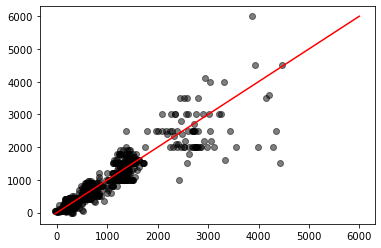

In [171]:
#Predicted data vs actual test data
model = xgb.XGBRegressor()
model.fit(xtr,ytr)
predyt = model.predict(xt)
actualyt = yt
plt.figure()
plt.scatter(predyt, actualyt, color = 'k', alpha=0.5)
plt.plot([min(predyt),max(actualyt)], [min(predyt),max(actualyt)], 'k-', color = 'r')
plt.show()

In [173]:
import pickle
filename='baseball_case.pkl'
pickle.dump(model,open(filename,'wb'))

## Price Range prediction (Classification approach)

In [174]:
#Seperate feature and target columns
x = df_new.drop('Price range', axis=1)
y = df_new['Price range']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (8756, 14)
y shape (8756,)


In [175]:
#We need to scale the data check VIF to handle multicollinearity
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_new = sc.fit_transform(x)
x_new = pd.DataFrame(x_new, columns = x.columns)

numerical = [ 'Longitude', 'Latitude', 'Aggregate rating','Votes']

#VIF method to check multicollinearity 
#Checing for continuous input feature columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif = [variance_inflation_factor(x_new[numerical].values,i) for i in range(x_new[numerical].shape[1])]
vif

[1.595864174084487, 1.5973520619519204, 1.2326389328430547, 1.2181227884652222]

No issue of multicollinearity as the VIF value of columns having continuous data are within the limit of 5

In [180]:
x_new[numerical].skew()

Longitude          -3.179687
Latitude           -2.246169
Aggregate rating   -0.887535
Votes               3.555810
dtype: float64

In [181]:
#Apply power transform to reduce skewness
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer()
for col in numerical:
    if x_new.skew().loc[col]>0.55:
        x_new[col] = po.fit_transform(x_new[col].values.reshape(-1,1))

In [182]:
x =x_new

In [183]:
#Feature selection
from sklearn.ensemble import ExtraTreesClassifier
fs = ExtraTreesClassifier()
fs.fit(x, y)

ExtraTreesClassifier()

In [184]:
imp = fs.feature_importances_
for index, val in enumerate(imp):
    print(index, round((val * 100), 2))

0 4.87
1 1.0
2 2.97
3 4.55
4 4.57
5 4.95
6 6.12
7 40.54
8 0.52
9 8.24
10 3.61
11 5.98
12 2.39
13 9.7


In [185]:
#Let us select important features and drop rest columns. By considering top 70% are important
#Dropping off less important columns
x =  x.drop(['Country Code','Has Table booking','City','Rating text'], axis=1)

In [187]:
#Logistic regression
#Best randm state selection
max_acc = 0
max_RS = 0
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
lr = LogisticRegression()
for i in range(0,200):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr, ytr)
    predyt = lr.predict(xt)
    accuracy = accuracy_score(yt,predyt)  
    if accuracy > max_acc:
        max_acc = accuracy
        max_RS = i
        print('At Max RS',i,'Max Accuracy =',accuracy)

At Max RS 0 Max Accuracy = 0.9092465753424658
At Max RS 6 Max Accuracy = 0.916095890410959
At Max RS 15 Max Accuracy = 0.9178082191780822
At Max RS 123 Max Accuracy = 0.91837899543379


In [188]:
def metric_score(model, xtr, xt, ytr, yt, train=True):
    if train:
        ypr = model.predict(xtr)
        print(f"Accuracy score of train is : {(accuracy_score(ytr, ypr))*100:.2f}%")
        
    elif train==False:
        ypr = model.predict(xt)
        print(f"Accuracy score of test is : {(accuracy_score(yt, ypr))*100:.2f}%",'\n\nClassification report:')
        print(classification_report(yt, ypr))

In [189]:
#Using best random state for train test split
xtr, xt, ytr, yt = train_test_split(x,y, random_state=123,test_size=0.2)
#Training the model
model = LogisticRegression()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 90.15%
Accuracy score of test is : 91.84% 

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       887
           1       0.88      0.96      0.92       547
           2       0.80      0.78      0.79       232
           3       0.89      0.56      0.69        86

    accuracy                           0.92      1752
   macro avg       0.89      0.82      0.84      1752
weighted avg       0.92      0.92      0.92      1752



In [190]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.91837899543379
CV score at 2 = 0.9122887163088168
CV score at 3 = 0.9098903194099964
CV score at 4 = 0.9045226130653266
CV score at 5 = 0.8977854793998994
CV score at 6 = 0.896877357043825
CV score at 7 = 0.8959497544821284
CV score at 8 = 0.8959587580242585
CV score at 9 = 0.8970875034246559
CV score at 10 = 0.8983500326157859

Least difference of CV score and F1 score of testing is : 0.006090279124973175


In [191]:
#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Accuracy f1 score test' ,'CV score','F1-CV score diff'])
model_result.loc[len(model_result.index)] = ['Logistic regression', acc, cvs, least_diff] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff
0,Logistic regression,0.918379,0.912289,0.00609


In [192]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 98.00% 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.98      0.99      0.98       547
           2       0.94      0.94      0.94       232
           3       0.93      0.88      0.90        86

    accuracy                           0.98      1752
   macro avg       0.96      0.95      0.96      1752
weighted avg       0.98      0.98      0.98      1752



In [193]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.9800228310502284
CV score at 2 = 0.9165143901324806
CV score at 3 = 0.9416376425932592
CV score at 4 = 0.9482640475102786
CV score at 5 = 0.9475840289567083
CV score at 6 = 0.9414187173925971
CV score at 7 = 0.945736119675688
CV score at 8 = 0.9505515764694097
CV score at 9 = 0.9513325259839159
CV score at 10 = 0.9521446836268754

Least difference of CV score and F1 score of testing is : 0.027878147423352928


In [194]:
# Hyper parameter tuning for decision tree model
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':["gini", "entropy"],
              'splitter':["best", "random"],
              'max_depth':[6,10,15,20],
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

DecisionTreeClassifier(max_depth=20, max_features='auto')


In [277]:
#Training model as per best parameters
model = DecisionTreeClassifier(max_depth=20, max_features='auto')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 97.03% 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.98      0.97      0.97       547
           2       0.90      0.92      0.91       232
           3       0.86      0.83      0.84        86

    accuracy                           0.97      1752
   macro avg       0.93      0.93      0.93      1752
weighted avg       0.97      0.97      0.97      1752



In [278]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Decision tree classifier', acc, cvs, abs(least_diff)] 
model_result

Accuracy score: 0.9703196347031964
CV score at 2 = 0.8556418455915944
CV score at 3 = 0.9338715652367952
CV score at 4 = 0.8236637734125172
CV score at 5 = 0.7854202034584282
CV score at 6 = 0.9083017235173901
CV score at 7 = 0.9056541738038141
CV score at 8 = 0.9065840658469193
CV score at 9 = 0.8530073060892849
CV score at 10 = 0.8976632746249184

Least difference of CV score and F1 score of testing is : 0.03644806946640122


,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff
0,Logistic regression,0.918379,0.912289,0.006090
1,Decision tree classifier,0.970320,0.933872,0.036448


In [280]:
#K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 88.68%
Accuracy score of test is : 83.45% 

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       887
           1       0.76      0.79      0.78       547
           2       0.80      0.72      0.76       232
           3       0.89      0.59      0.71        86

    accuracy                           0.83      1752
   macro avg       0.83      0.76      0.79      1752
weighted avg       0.84      0.83      0.83      1752



In [281]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8344748858447488
CV score at 2 = 0.7206486980356328
CV score at 3 = 0.7425790690271635
CV score at 4 = 0.7560529922338968
CV score at 5 = 0.7574260240071558
CV score at 6 = 0.7714806695021611
CV score at 7 = 0.7584470480758251
CV score at 8 = 0.7639489577855133
CV score at 9 = 0.7703213090902941
CV score at 10 = 0.7653180691454663

Least difference of CV score and F1 score of testing is : 0.06299421634258773


In [282]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['KNN classifier', acc, cvs, abs(least_diff)] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff
0,Logistic regression,0.918379,0.912289,0.006090
1,Decision tree classifier,0.970320,0.933872,0.036448
2,KNN classifier,0.834475,0.771481,0.062994


In [283]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 99.34%
Accuracy score of test is : 98.29% 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.97      1.00      0.98       547
           2       0.95      0.94      0.94       232
           3       0.96      0.88      0.92        86

    accuracy                           0.98      1752
   macro avg       0.97      0.95      0.96      1752
weighted avg       0.98      0.98      0.98      1752



In [284]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.9828767123287672
CV score at 2 = 0.9548880767473733
CV score at 3 = 0.9553436267924855
CV score at 4 = 0.9547738693467337
CV score at 5 = 0.9561497148400523
CV score at 6 = 0.9568344490659455
CV score at 7 = 0.9554493091241294
CV score at 8 = 0.9539788426702729
CV score at 9 = 0.9544185932852778
CV score at 10 = 0.9536310502283104

Least difference of CV score and F1 score of testing is : 0.026042263262821663


In [293]:
# Hyper parameter tuning for gradient boost model
from sklearn.model_selection import GridSearchCV
parameters = { 'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'], 
              'n_estimators':[50,100,125,150], 
              'learning_rate' :[0.01, 0.1,1], 
              'loss':['deviance', 'exponential']}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingClassifier(criterion='squared_error')


In [294]:
#Training model as per best parameters
model = GradientBoostingClassifier(criterion='squared_error')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 99.34%
Accuracy score of test is : 98.34% 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.97      1.00      0.99       547
           2       0.95      0.94      0.95       232
           3       0.96      0.88      0.92        86

    accuracy                           0.98      1752
   macro avg       0.97      0.95      0.96      1752
weighted avg       0.98      0.98      0.98      1752



In [295]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Gradient boost classifier', acc, cvs, abs(least_diff)] 
model_result

Accuracy score: 0.9834474885844748
CV score at 2 = 0.9548880767473733
CV score at 3 = 0.9553436267924855
CV score at 4 = 0.9546596619460941
CV score at 5 = 0.9560355595889106
CV score at 6 = 0.9568344490659455
CV score at 7 = 0.955563503482928
CV score at 8 = 0.953179755912282
CV score at 9 = 0.9545327876440763
CV score at 10 = 0.9536310502283104

Least difference of CV score and F1 score of testing is : 0.026613039518529336


,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff
0,Logistic regression,0.918379,0.912289,0.006090
1,Decision tree classifier,0.970320,0.933872,0.036448
2,KNN classifier,0.834475,0.771481,0.062994
3,Gradient boost classifier,0.983447,0.956834,0.026613


In [296]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 97.55% 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.97      0.99      0.98       547
           2       0.91      0.94      0.92       232
           3       0.96      0.79      0.87        86

    accuracy                           0.98      1752
   macro avg       0.96      0.93      0.94      1752
weighted avg       0.98      0.98      0.98      1752



In [297]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.9754566210045662
CV score at 2 = 0.9500913659205117
CV score at 3 = 0.9506603666445087
CV score at 4 = 0.950776610324349
CV score at 5 = 0.9518097290784912
CV score at 6 = 0.9515808820077555
CV score at 7 = 0.9511065433367591
CV score at 8 = 0.949978921973738
CV score at 9 = 0.9500746257785071
CV score at 10 = 0.9511150684931506

Least difference of CV score and F1 score of testing is : 0.023646891926075053


In [310]:
# Hyper parameter tuning for random forest model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators':[80,90,100,150], 
              'criterion':["entropy",'gini'], 
              'max_depth' :[4, 8, 14, 16, 20], 
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestClassifier(max_depth=16, max_features='log2')


In [311]:
#Training model as per best parameters
model = RandomForestClassifier(max_depth=16, max_features='log2')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 97.66% 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.97      0.99      0.98       547
           2       0.92      0.93      0.92       232
           3       0.96      0.83      0.89        86

    accuracy                           0.98      1752
   macro avg       0.96      0.93      0.95      1752
weighted avg       0.98      0.98      0.98      1752



In [312]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Random forest classifier', acc, cvs, abs(least_diff)] 
model_result

Accuracy score: 0.9765981735159818
CV score at 2 = 0.9508908177249886
CV score at 3 = 0.9494039547564924
CV score at 4 = 0.9505481955230699
CV score at 5 = 0.9516959649932588
CV score at 6 = 0.9511242610031893
CV score at 7 = 0.950763777549389
CV score at 8 = 0.9498651841092551
CV score at 9 = 0.9500741558428741
CV score at 10 = 0.949858708414873

Least difference of CV score and F1 score of testing is : 0.024902208522722957


,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff
0,Logistic regression,0.918379,0.912289,0.006090
1,Decision tree classifier,0.970320,0.933872,0.036448
2,KNN classifier,0.834475,0.771481,0.062994
3,Gradient boost classifier,0.983447,0.956834,0.026613
4,Random forest classifier,0.976598,0.951696,0.024902


Both GB classifier and RF classifiers giving best results

Based on lowest CV-F1 test score differnce as minimum RFc can be selected as best model

In [313]:
#Prediction using selected best model
model = RandomForestClassifier(max_depth=16, max_features='log2')
model.fit(xtr,ytr)
predyt = model.predict(xt)

In [320]:
table = pd.DataFrame()
table['Actual price range'] = yt
table['Predicted price range'] = predyt
table.sample(5)

,Actual price range,Predicted price range
8083,2,2
7133,0,0
3256,1,1
1470,2,2
6640,1,1


In [321]:
#Saving the model
import pickle
filename='zomato_cls.pkl'
pickle.dump(model,open(filename,'wb'))